<a href="https://colab.research.google.com/github/Srinivaskolli45/s4_assignment/blob/main/s12_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import cv2
import numpy as np


In [59]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-04-07 05:31:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  20.1MB/s    in 15s     

2023-04-07 05:31:28 (16.0 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [ ]:
!git clone https://github.com/Srinivaskolli45/s12_assignment_yolo_opencv.git

In [9]:
import sys
sys.path.append('/content/s12_assignment_yolo_opencv/')

In [15]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "/content/s12_assignment_yolo_opencv/yolov3.cfg")
classes = []
with open("/content/s12_assignment_yolo_opencv/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

print(f'Classes -- > {classes}')
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print(f'Output layers {output_layers}')
colors = np.random.uniform(0, 255, size=(len(classes), 3))

Classes -- > ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Output layers ['yolo_82', 'yolo_94', 'yolo_106']


In [49]:
# Loading image
img = cv2.imread("/content/s12_assignment_yolo_opencv/test_image_1.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape


In [52]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)
print(f'Outs type and shape --> {type(outs)}')

Outs type and shape --> <class 'tuple'>


In [53]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [54]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [55]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)


In [56]:
from google.colab.patches import cv2_imshow

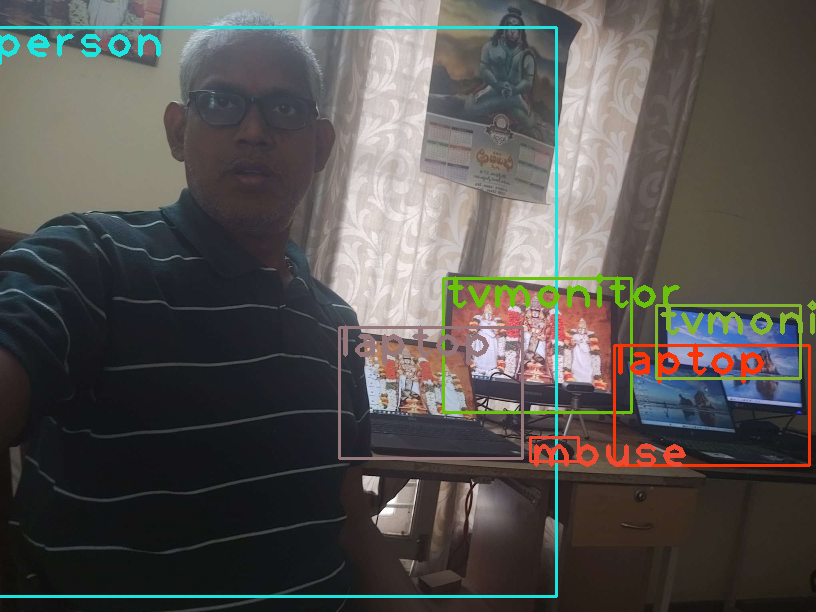

-1

In [57]:
cv2_imshow(img)
cv2.imwrite("/content/s12_assignment_yolo_opencv/annotated_image.jpg",img)
cv2.waitKey(0)

#cv2.destroyAllWindows()